# Relation between Gaussian mixture vs KNN

## likelyhood function for Gaussian mixture

$P(X|\pi_i,\mu_i,\sigma_i)=\displaystyle \prod_{j=1}^{k}\frac{1}{\sigma_i*\sqrt{2*\pi}}*e^{(\frac{x_j-\mu_i}{\sigma_1})^2}$

GM algorishm for unlabel data is mean to estimate $\pi_i, \mu_i, \sigma_i$ given data

$P(\pi_i, \mu_i, \sigma_i| X)= \frac{P(X|\pi_i, \mu_i, \sigma_i)*P(\pi_i, \mu_i, \sigma_i)}{P(X)}$
$= \frac{\pi_i*\displaystyle \prod_{j=1}^{k}\frac{1}{\sigma_i*\sqrt{2*\pi}}*e^{(\frac{x_j-\mu_i}{\sigma_1})^2}}{\displaystyle \sum _{l=1}^n P(X| \pi_l, \mu_l, \sigma_l )}$

if we consider the ratio that 
$$\frac{P(\pi_i, \mu_i, \sigma_i| X)}{P(\pi_k, \mu_k, \sigma_k| X)}= \frac{\pi_i*\displaystyle \prod_{j=1}^{K}\frac{1}{\sigma_i*\sqrt{2*\pi}}*e^{(\frac{x_j-\mu_i}{\sigma_i})^2}}{\pi_k*\displaystyle \prod_{j=1}^{K}\frac{1}{\sigma_k*\sqrt{2*\pi}}*e^{(\frac{x_j-\mu_k}{\sigma_k})^2}}
= \frac{\pi_i*\sigma_k}{\pi_k*\sigma_i}*\displaystyle\prod_{j=1}^K e^{(\frac{x_j-\mu_i}{\sigma_i})^2-(\frac{x_j-\mu_k}{\sigma_k})^2}$$

## K-mean
purpose of K mean is to minimize the distance of inside cluster measure. Given some data, we want to estimate $\mu_i$
$$\displaystyle\sum_{i=0}^K \displaystyle\sum_{j| x_j\in \mu_i}^N  (x_j-\mu_i)^2$$

# Average clustering

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import sklearn as sk
import pandas as pd

from scipy.linalg import eig, eigh

from clustering_util import ASE, LSE, cluster_member, GMM_cluster, averaging_cluster, coclustering_trials, quality_score

In [2]:
# A quick visualization of a single example
sizes2 = [2*20, 2*30]
n_nodes = sum(sizes2)
aa, ab, bb = 1, 0, 1
C_true = [[aa, ab], [ab, bb]]  # define the parameters of the stochastic block model
k_true = np.hstack([[i]*s for i,s in enumerate(sizes2)])  # True cluster label vector

g2 = nx.stochastic_block_model(sizes2, C_true)  # generate a random graph

pA = ASE(g2)
pL = LSE(g2)

k_ASEGMM = GMM_cluster(pA.T)
k_LSEGMM = GMM_cluster(pL.T)

print("p_AA =", aa)
print("p_AB =", ab)
print("p_BB =", bb)

p_AA = 1
p_AB = 0
p_BB = 1


In [3]:
last_node = -1
g2.add_node(last_node)
g2.add_edges_from([(-1, a) for a in np.random.choice(range(sizes2[0]), size=10, replace=False)])
g2.add_edges_from([(-1, b) for b in np.random.choice(range(sizes2[0], sizes2[0] + sizes2[1]), size=10, replace=False)])

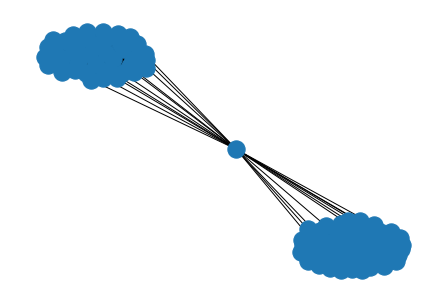

In [4]:
nx.draw(g2)

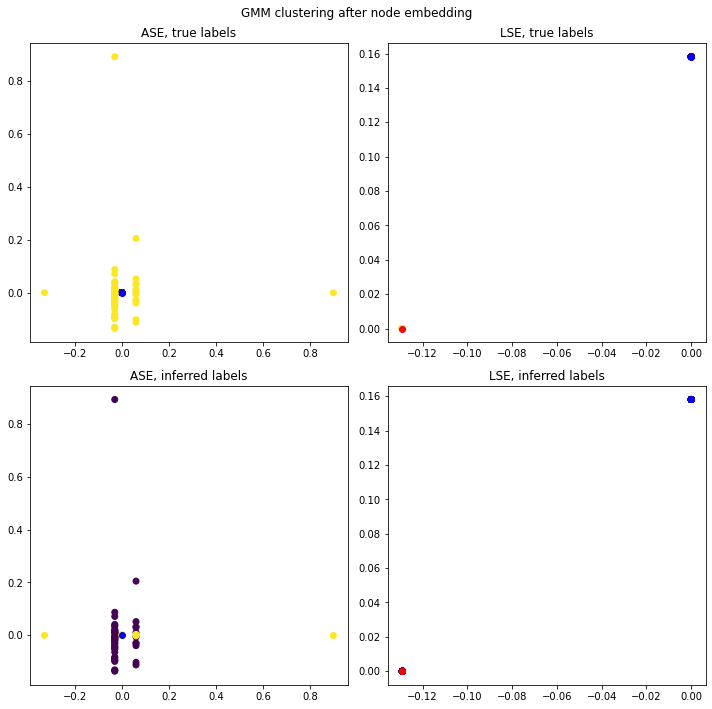

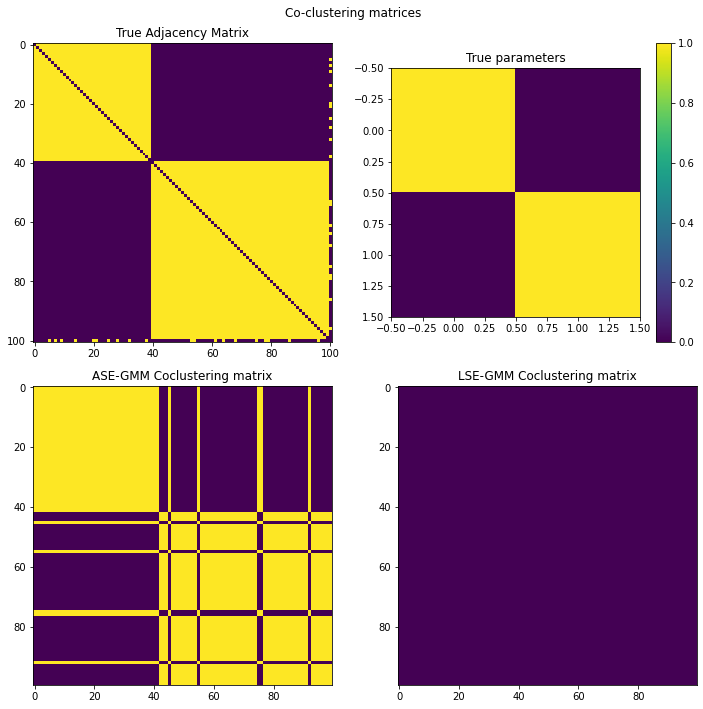

In [5]:
node = -1

plt.figure(figsize=(10,10), tight_layout="tight")
plt.suptitle("GMM clustering after node embedding")
plt.subplot(2,2,1)
plt.scatter(pA[0], pA[1], c=k_true)
plt.title("ASE, true labels")
plt.scatter([pA[0,0]], [pA[1,0]], c="blue")

plt.subplot(2,2,2)
plt.scatter(pL[0], pL[1], c=k_true)
plt.title("LSE, true labels")
plt.scatter([pL[0, node]], [pL[1, node]], c="red")
plt.scatter([pL[0,0]], [pL[1,0]], c="blue")

plt.subplot(2,2,3)
plt.scatter(pA[0], pA[1], c=k_ASEGMM)
plt.title("ASE, inferred labels")
plt.scatter([pA[0,0]], [pA[1,0]], c="blue")

plt.subplot(2,2,4)
plt.scatter(pL[0], pL[1], c=k_LSEGMM)
plt.title("LSE, inferred labels")
plt.scatter([pL[0, node]], [pL[1, node]], c="red")
plt.scatter([pL[0,0]], [pL[1,0]], c="blue")

plt.figure(figsize=(10,10), tight_layout="tight")
plt.suptitle("Co-clustering matrices")
plt.subplot(2,2,1)
plt.title("True Adjacency Matrix")
plt.imshow(nx.adjacency_matrix(g2).todense(), interpolation="none")

plt.subplot(2,2,2)
plt.title("True parameters")
plt.imshow(C_true, interpolation="none")
plt.colorbar()

plt.subplot(2,2,3)
plt.title("ASE-GMM Coclustering matrix")
plt.imshow(cluster_member(k_ASEGMM), interpolation="none")

plt.subplot(2,2,4)
plt.title("LSE-GMM Coclustering matrix")
plt.imshow(cluster_member(k_LSEGMM), interpolation="none")

In [6]:
n_trials = 50
# C_all = np.zeros((n_trials, n_nodes, n_nodes))
# k_all = np.zeros((n_trials, n_nodes))
# C_avg = averaging_cluster(g2, times=n_trials, embeding=LSE, return_labels=k_all, coclusters=C_all)
k_all, C_all = coclustering_trials(g2, n_trials, embedding=LSE)
C_avg = C_all.mean(axis=0)

(0.0, 1.0)

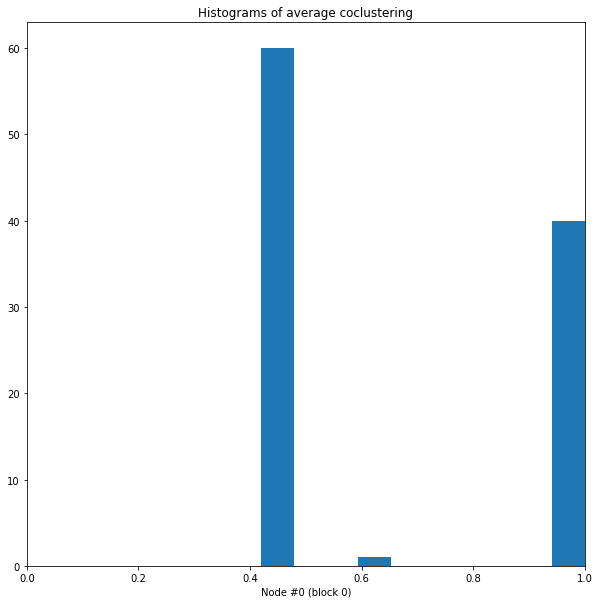

In [7]:
plt.figure(figsize=(10,10))
plt.title("Histograms of average coclustering")
# for row in C_avg:
#     plt.hist(row, density=True, alpha=0.5)
node = 0
plt.hist(C_avg[node])
plt.xlabel(f"Node #{node:d} (block {k_true[node]})")

plt.xlim(0,1)

Text(0.5, 0, 'Coclustering')

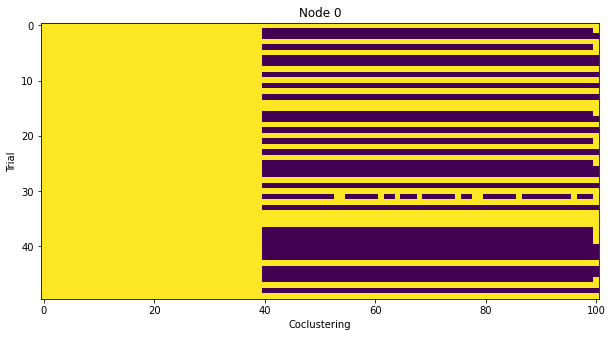

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(C_all[:,node,:], interpolation="none")
plt.title("Node "+str(node))
plt.ylabel("Trial")
plt.xlabel("Coclustering")

<BarContainer object of 101 artists>

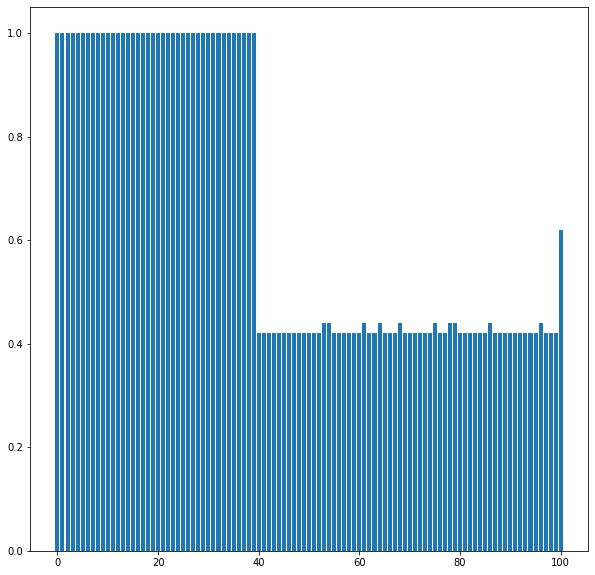

In [9]:
plt.figure(figsize=(10,10))
plt.bar(range(n_nodes+1), C_all[:,node,:].mean(axis=0))

In [14]:
C_all[:,node,:].mean(axis=0)

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.42, 0.42, 0.42, 0.42,
       0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.44, 0.44,
       0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.44, 0.42, 0.42, 0.44, 0.42,
       0.42, 0.42, 0.44, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.44, 0.42,
       0.42, 0.44, 0.44, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.44, 0.42,
       0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.44, 0.42, 0.42,
       0.42, 0.62])